# Digital Marketing Analytics - Group Assignment 1 

### Context

- Multi-channel company with sales of $700M per year
- Retail stores, Catalog, Website
- Brand is well known nationaly, strong positive reputation, good long term customer loyalty
- Food products, purchased as gifts for Christmas

### Marketing challenges

1. CRM (contact management across channels)
2. Competitive marketplace for Christmas gifts
3. Generating business off Christmas

3 differrent marketing channels: __retail, catalogue, website__

## Importing libraries

In [27]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
pd.options.display.max_columns = None
pd.options.display.max_rows = None

## EDA

### Dataset

4 files:

In [29]:
customers = pd.read_csv('datasets/DMEFExtractSummaryV01.csv')
contacts = pd.read_csv('datasets/DMEFExtractContactsV01.csv')
orders = pd.read_csv('datasets/DMEFExtractOrdersV01.csv')
line_items = pd.read_csv('datasets/DMEFExtractLinesV01.csv')

1. "DMEFExtractSummaryV01.csv": __Customer file__.
    - customer ID (*cust_ID*)
    - First 3 digits or the customer's ZIPCode (*SCF_Code*)
    - Purchasing behaviour variables have a naming scheme with 3 components: 
        - Channel: 
            - _Ret_ (retail), 
            - _Int_ (internet)
            - _Cat_ (catalog)
        - Season: _F_ (fall) or _S_ (spring) followed by the last 2 digits of the year. Summaries for the period prior to 2004 have the designation Pre04.
        - Measure:
            - _Dollars_ (Retail sales), 
            - _GDollars_ (Gift), 
            - _NGDollars_ (Non gift),
            -  _Orders_ (number of orders made),
            - _Trips_ (number of trips to retail store)
            -  _Lines_ (Number of different product lines purchased (a product line is a collection of similar products sold under one brand by a single company))
            
            For _Pre04_ (before 2004), _Recency_: recency of last purchase measured in number of season prior to 2004 (99 means not purchased in the channel prior to 2004)

        For example *RetF07Dollars*: customer's Fall 2007 Retail sales dollar total 

    - *EmailsSeasonYY*: Number of mails sent to the customer during this period
    - *CatCircSeasonYY*: Number of catalogs sent to the customer during this period
    - *GiftRecSeasonYY*: "Gifts recipiens counts for this season"
    - *NewGRSeasonYY*: __?__

    - *First YYMM*: Year and Month of the customer's first purchase
    - *FirstChannel*: Channel used for the customer's first purchase 
    - *FirstDollar*: Amount spent on the customer's first purchas
    
    - *AcqDate*: Year and Month that the company added the customer to its database.
    - *StoreDist*: Estimated distance from the customer's address to the nearest store in miles
    - Interest in topics, "Y" or "N" (*Travel, CurrAff, CurrEv, Wines, FineArts, Exercise, SelfHelp, Collect, Needle, Sewing, DogOwner, CarOwner, Cooking, Pets, Fashion, Camping, Hunting* and *Boating*)
    - Presence of children of various age ranges in the household (*Child0_2, Child3_5, Child6_11, Child12_16* and *Child17_18*)
    - _Email_: "Y" or "N", permission to send e-mails to the customer.
    - _HomeValue_: Estimated value of the customer's home in $

    - _AgeCode, IncCode, HomeCode, Dwelling, LengthRes_ and _OccupCd_:  Reference for these codes are not available

In [30]:
customers.head()

,Cust_ID,SCF_Code,RetF07Dollars,RetF07Trips,RetF07Lines,RetS07Dollars,RetS07Trips,RetS07Lines,RetF06Dollars,RetF06Trips,RetF06Lines,RetS06Dollars,RetS06Trips,RetS06Lines,RetF05Dollars,RetF05Trips,RetF05Lines,RetS05Dollars,RetS05Trips,RetS05Lines,RetF04Dollars,RetF04Trips,RetF04Lines,RetS04Dollars,RetS04Trips,RetS04Lines,RetPre04Dollars,RetPre04Trips,RetPre04Lines,RetPre04Recency,IntF07GDollars,IntF07NGDollars,IntF07Orders,IntF07Lines,IntS07GDollars,IntS07NGDollars,IntS07Orders,IntS07Lines,IntF06GDollars,IntF06NGDollars,IntF06Orders,IntF06Lines,IntS06GDollars,IntS06NGDollars,IntS06Orders,IntS06Lines,IntF05GDollars,IntF05NGDollars,IntF05Orders,IntF05Lines,IntS05GDollars,IntS05NGDollars,IntS05Orders,IntS05Lines,IntF04GDollars,IntF04NGDollars,IntF04Orders,IntF04Lines,IntS04GDollars,IntS04NGDollars,IntS04Orders,IntS04Lines,IntPre04GDollars,IntPre04NGDollars,IntPre04Orders,IntPre04Lines,IntPre04Recency,CatF07GDollars,CatF07NGDollars,CatF07Orders,CatF07Lines,CatS07GDollars,CatS07NGDollars,CatS07Orders,CatS07Lines,CatF06GDollars,CatF06NGDollars,CatF06Orders,CatF06Lines,CatS06GDollars,CatS06NGDollars,CatS06Orders,CatS06Lines,CatF05GDollars,CatF05NGDollars,CatF05Orders,CatF05Lines,CatS05GDollars,CatS05NGDollars,CatS05Orders,CatS05Lines,CatF04GDollars,CatF04NGDollars,CatF04Orders,CatF04Lines,CatS04GDollars,CatS04NGDollars,CatS04Orders,CatS04Lines,CatPre04GDollars,CatPre04NGDollars,CatPre04Orders,CatPre04Lines,CatPre04Recency,EmailsF07,EmailsS07,EmailsF06,EmailsS06,EmailsF05,EmailsS05,CatCircF07,CatCircS07,CatCircF06,CatCircS06,CatCircF05,CatCircS05,GiftRecF07,GiftRecS07,GiftRecF06,GiftRecS06,GiftRecF05,GiftRecS05,GiftRecF04,GiftRecS04,GiftRecPre04,NewGRF07,NewGRS07,NewGRF06,NewGRS06,NewGRF05,NewGRS05,NewGRF04,NewGRS04,NewGRPre04,FirstYYMM,FirstChannel,FirstDollar,StoreDist,AcqDate,Email,OccupCd,Travel,CurrAff,CurrEv,Wines,FineArts,Exercise,SelfHelp,Collect,Needle,Sewing,DogOwner,CarOwner,Cooking,Pets,Fashion,Camping,Hunting,Boating,AgeCode,IncCode,HomeCode,Child0_2,Child3_5,Child6_11,Child12_16,Child17_18,Dwelling,LengthRes,HomeValue
0,22120,346,0,0,0,0,0,0,14,1,1,0,0,0,0,0,0,0,0,0,70,1,5,0,0,0,0,0,0,99,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,99,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,99,0,0,0,0,0,0,6,1,4,0,8,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,200412,Ret,70,15.93,200412,N,,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,4,8,2,N,N,N,N,N,1,8,0
1,24436,,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,99,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,99,0,0,0,0,41,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,99,61,16,37,9,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,200706,Cat,41,,199611,Y,,N,N,N,,N,,,N,N,N,N,N,N,N,N,,N,,,,,N,N,N,N,N,,3,0
2,29278,85,0,0,0,0,0,0,63,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,99,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,99,29,0,1,1,0,0,0,0,27,0,1,1,0,0,0,0,65,0,1,2,0,0,0,0,65,0,1,2,0,0,0,0,25,0,1,1,1,0,0,0,0,0,0,2,0,2,0,3,2,1,0,1,0,2,0,2,0,1,0,0,0,0,0,0,1,0,1,200312,Cat,25,0,200312,N,,Y,N,Y,Y,Y,Y,N,Y,N,N,Y,N,Y,N,Y,N,N,N,7,9,2,N,N,N,N,N,2,2,0
3,50011,,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,99,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,36,46,1,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,99,0,0,34,12,42,31,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,200301,Int,82,,199712,Y,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
4,51943,,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,99,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,24,0,1,1,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,209,0,1,1,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,200112,Cat,209,,199903,N,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,


2. "DMEFExtractContactsV01": __Contact file__.
    - customer ID (*cust_ID*)
    - *ContactDate*: date the contact was made
    - *ContactType*: Catalaog (C) or Email (E)

In [52]:
contacts.head(5)

,Cust_ID,ContactDate,ContactType
0,22120,20070907,C
1,22120,20071101,C
2,22120,20071011,C
3,22120,20071122,C
4,22120,20071206,C


In [32]:
# Calculate value counts
contact_distribution = contacts['ContactType'].value_counts()

# Convert to DataFrame for better formatting
contact_distribution_df = contact_distribution.reset_index()
contact_distribution_df.columns = ['Contact Type', 'Count']

# Replace 'E' with 'Email' and 'C' with 'Catalog' in the output DataFrame only
contact_distribution_df['Contact Type'] = contact_distribution_df['Contact Type'].replace({'E': 'Email', 'C': 'Catalog'})

# Apply thousand separator
contact_distribution_df['Count'] = contact_distribution_df['Count'].apply(lambda x: f"{x:,}")

# Styling the DataFrame for better readability
styled_df = contact_distribution_df.style.set_table_styles(
    [{
        'selector': 'th',
        'props': [
            ('background-color', '#f4f4f4'),
            ('color', 'black')
        ]
    }]
).set_properties(**{
    'text-align': 'left',
}).hide(axis='index')  # Hide the index column


styled_df

Contact Type,Count
Email,"2,368,315"
Catalog,"1,021,014"


3. "DMEFExtractOrdersV01.csv": __Order file__.
    - customer ID (*cust_ID*)
    - *OrderNum*: order number that links order and line item records
    - *OrderDate*
    - *OrderMethod*: 
        - *ST*: Store
        - *I*: Internet
        - *P*: Phone
        - *M*: Mail
        
        Phone and mail are the two methods by which catalog channel orders are placed

    - *PaymentType*:
        - *BC*: Bankcard
        - *CA*: Cash
        - *CK*: Check
        - *GC*: Gift certificate
        - *HA*: House account
        - *NV* and *PC*: not documented by the company. 
    
        Virtually all payments are bankcard, cash or check.

In [33]:
orders.head(5)

,Cust_ID,OrderNum,OrderDate,OrderMethod,PaymentType
0,22120,6642001731,20041213,ST,BC
1,22120,6643008965,20061209,ST,CA
2,24436,7200158663,20070616,P,BC
3,29278,2200159161,20031201,P,BC
4,29278,5800062930,20061208,P,BC


4. "DMEFExtractLinesV01.csv": __Order file__.
    - customer ID (*cust_ID*)
    - *OrderNum*: order number that links order and line item records
    - *OrderDate*
    - *LineDollars*: Selling price of the line item in $
    - *Gift*: "Y" or "N", indicates whether the item was given as a gift. Not recorded for Retail channel
    - *RecipNum*: ID number of a gift recipient. Can be used to see if a recipient receives multiple gifts over time.

In [9]:
line_items.head(5)

,Cust_ID,OrderNum,OrderDate,LineDollars,Gift,RecipNum
0,22120,6643008965,20061209,13.95,,
1,22120,6642001731,20041213,10.95,,
2,22120,6642001731,20041213,4.95,,
3,22120,6642001731,20041213,34.95,,
4,22120,6642001731,20041213,10.95,,


## 1. Which channel has better response rates, catalog mailing or email?

In [58]:
# Convert 'ContactDate' and 'OrderDate' to datetime
contacts['ContactDate'] = pd.to_datetime(contacts['ContactDate'].astype(str), format='%Y%m%d')
orders['OrderDate'] = pd.to_datetime(orders['OrderDate'].astype(str), format='%Y%m%d')

In [79]:
order_sub = orders.groupby(['Cust_ID', 'OrderDate']).agg(n_of_order=('OrderNum', 'count')).reset_index()

# Create contact_c and contact_e DataFrames for each contact type and group by 'Cust_ID' and 'ContactDate' columns to count the number of contacts sent per day for each customer.
contact_c = contacts[contacts['ContactType'] == 'C'].groupby(['Cust_ID', 'ContactDate']).size().reset_index(name='catalog_sent')
contact_e = contacts[contacts['ContactType'] == 'E'].groupby(['Cust_ID', 'ContactDate']).size().reset_index(name='email_sent')


In [80]:
order_sub.head()

,Cust_ID,OrderDate,n_of_order
0,22120,2004-12-13,1
1,22120,2006-12-09,1
2,24436,2007-06-16,1
3,29278,2003-12-01,1
4,29278,2004-12-11,1


In [81]:
contact_c.head(5)

,Cust_ID,ContactDate,catalog_sent
0,22120,2005-04-14,2
1,22120,2005-09-09,1
2,22120,2005-10-14,1
3,22120,2005-11-03,1
4,22120,2005-11-10,1


In [82]:
contact_e.head(5)

,Cust_ID,ContactDate,email_sent
0,24436,2006-03-21,1
1,24436,2006-04-03,1
2,24436,2006-04-06,1
3,24436,2006-04-27,1
4,24436,2006-05-04,1


We calculate response rate for catalogs (considering a response window, e.g., 7 days). 

In [83]:
# Merge contact_c and order_sub DataFrames on 'Cust_ID' column to find customers who received a catalog and made a purchase within 7 days.
catalog_response = pd.merge(contact_c, order_sub, on='Cust_ID')
catalog_response = catalog_response[(catalog_response['OrderDate'] >= catalog_response['ContactDate']) &  
                                    (catalog_response['OrderDate'] <= catalog_response['ContactDate'] + pd.DateOffset(days=7))]

# Aggregate to find total responses
responded_catalog = catalog_response.groupby('Cust_ID').agg(sum_respond_catalog=('catalog_sent', 'sum')).reset_index()

# Total catalogs sent
total_catalogs_sent = contact_c['catalog_sent'].sum()

# Response rate calculation
response_rate_catalog = responded_catalog['sum_respond_catalog'].sum() / total_catalogs_sent

# Print the response rate in percentage
print(f"Catalog Response Rate: {response_rate_catalog:.2%}")

Catalog Response Rate: 1.93%


In [84]:
# Merge contact_e and order_sub DataFrames on 'Cust_ID' column to find customers who received an email and made a purchase within 7 days.
email_response = pd.merge(contact_e, order_sub, on='Cust_ID')
email_response = email_response[(email_response['OrderDate'] >= email_response['ContactDate']) &  
                                (email_response['OrderDate'] <= email_response['ContactDate'] + pd.DateOffset(days=7))]

# Aggregate to find total responses
responded_email = email_response.groupby('Cust_ID').agg(sum_respond_email=('email_sent', 'sum')).reset_index()

# Total emails sent
total_emails_sent = contact_e['email_sent'].sum()

# Response rate calculation
response_rate_email = responded_email['sum_respond_email'].sum() / total_emails_sent

# Print the response rate in percentage
print(f"Email Response Rate: {response_rate_email:.2%}")

Email Response Rate: 1.95%


In [57]:
order_sub.head(5)

,Cust_ID,OrderDate,n_of_order
0,22120,1970-01-01 00:00:00.020041213,1
1,22120,1970-01-01 00:00:00.020061209,1
2,24436,1970-01-01 00:00:00.020070616,1
3,29278,1970-01-01 00:00:00.020031201,1
4,29278,1970-01-01 00:00:00.020041211,1


In [70]:
response_rate_catalog

0.019337638857057787

In [87]:
# We do the same with a delay of 10 days, then 14 days, then 31 days.
catalog_response_10 = pd.merge(contact_c, order_sub, on='Cust_ID')
catalog_response_10 = catalog_response_10[(catalog_response_10['OrderDate'] >= catalog_response_10['ContactDate']) &  
                                    (catalog_response_10['OrderDate'] <= catalog_response_10['ContactDate'] + pd.DateOffset(days=10))]
responded_catalog_10 = catalog_response_10.groupby('Cust_ID').agg(sum_respond_catalog_10=('catalog_sent', 'sum')).reset_index()

total_catalogs_sent_10 = contact_c['catalog_sent'].sum()

response_rate_catalog_10 = responded_catalog_10['sum_respond_catalog_10'].sum() / total_catalogs_sent_10

print(f"Catalog Response Rate (10 days): {response_rate_catalog_10:.2%}")

catalog_response_14 = pd.merge(contact_c, order_sub, on='Cust_ID')
catalog_response_14 = catalog_response_14[(catalog_response_14['OrderDate'] >= catalog_response_14['ContactDate']) &  
                                    (catalog_response_14['OrderDate'] <= catalog_response_14['ContactDate'] + pd.DateOffset(days=14))]
responded_catalog_14 = catalog_response_14.groupby('Cust_ID').agg(sum_respond_catalog_14=('catalog_sent', 'sum')).reset_index()

total_catalogs_sent_14 = contact_c['catalog_sent'].sum()

response_rate_catalog_14 = responded_catalog_14['sum_respond_catalog_14'].sum() / total_catalogs_sent_14

print(f"Catalog Response Rate (14 days): {response_rate_catalog_14:.2%}")

catalog_response_31 = pd.merge(contact_c, order_sub, on='Cust_ID')
catalog_response_31 = catalog_response_31[(catalog_response_31['OrderDate'] >= catalog_response_31['ContactDate']) &  
                                    (catalog_response_31['OrderDate'] <= catalog_response_31['ContactDate'] + pd.DateOffset(days=31))]
responded_catalog_31 = catalog_response_31.groupby('Cust_ID').agg(sum_respond_catalog_31=('catalog_sent', 'sum')).reset_index()

total_catalogs_sent_31 = contact_c['catalog_sent'].sum()

response_rate_catalog_31 = responded_catalog_31['sum_respond_catalog_31'].sum() / total_catalogs_sent_31

print(f"Catalog Response Rate (31 days): {response_rate_catalog_31:.2%}")

email_response_10 = pd.merge(contact_e, order_sub, on='Cust_ID')
email_response_10 = email_response_10[(email_response_10['OrderDate'] >= email_response_10['ContactDate']) &  
                                    (email_response_10['OrderDate'] <= email_response_10['ContactDate'] + pd.DateOffset(days=10))]
responded_email_10 = email_response_10.groupby('Cust_ID').agg(sum_respond_email_10=('email_sent', 'sum')).reset_index()

total_emails_sent_10 = contact_e['email_sent'].sum()

response_rate_email_10 = responded_email_10['sum_respond_email_10'].sum() / total_emails_sent_10

print(f"Email Response Rate (10 days): {response_rate_email_10:.2%}")

email_response_14 = pd.merge(contact_e, order_sub, on='Cust_ID')
email_response_14 = email_response_14[(email_response_14['OrderDate'] >= email_response_14['ContactDate']) &  
                                    (email_response_14['OrderDate'] <= email_response_14['ContactDate'] + pd.DateOffset(days=14))]
responded_email_14 = email_response_14.groupby('Cust_ID').agg(sum_respond_email_14=('email_sent', 'sum')).reset_index()

total_emails_sent_14 = contact_e['email_sent'].sum()

response_rate_email_14 = responded_email_14['sum_respond_email_14'].sum() / total_emails_sent_14

print(f"Email Response Rate (14 days): {response_rate_email_14:.2%}")

email_response_31 = pd.merge(contact_e, order_sub, on='Cust_ID')
email_response_31 = email_response_31[(email_response_31['OrderDate'] >= email_response_31['ContactDate']) &  
                                    (email_response_31['OrderDate'] <= email_response_31['ContactDate'] + pd.DateOffset(days=31))]
responded_email_31 = email_response_31.groupby('Cust_ID').agg(sum_respond_email_31=('email_sent', 'sum')).reset_index()

total_emails_sent_31 = contact_e['email_sent'].sum()

response_rate_email_31 = responded_email_31['sum_respond_email_31'].sum() / total_emails_sent_31

print(f"Email Response Rate (31 days): {response_rate_email_31:.2%}")

Catalog Response Rate (10 days): 2.66%
Catalog Response Rate (14 days): 3.73%
Catalog Response Rate (31 days): 7.65%
Email Response Rate (10 days): 2.58%
Email Response Rate (14 days): 3.39%
Email Response Rate (31 days): 6.16%


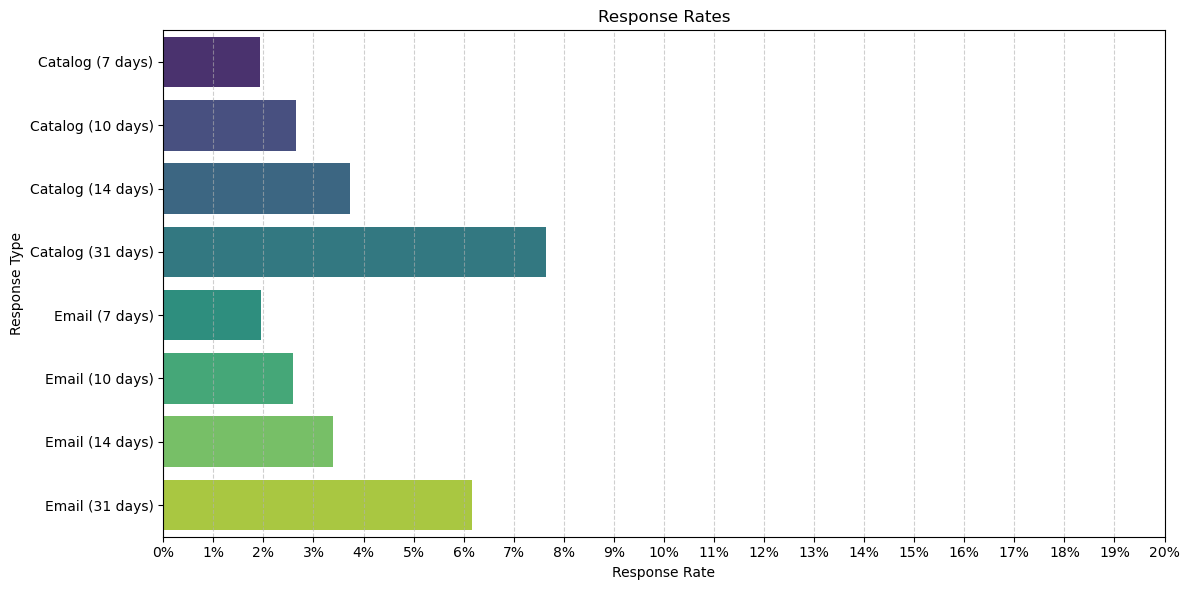

In [95]:
# Create a DataFrame for the response rates
response_rates = pd.DataFrame({
    'Response Type': ['Catalog (7 days)', 'Catalog (10 days)', 'Catalog (14 days)', 'Catalog (31 days)', 'Email (7 days)', 'Email (10 days)', 'Email (14 days)', 'Email (31 days)'],
    'Response Rate': [response_rate_catalog, response_rate_catalog_10, response_rate_catalog_14, response_rate_catalog_31, response_rate_email, response_rate_email_10, response_rate_email_14, response_rate_email_31]
})

# Apply percentage formatting
response_rates['Response Rate'] = pd.to_numeric(response_rates['Response Rate'].astype(str).str.rstrip('%'))

# Plot the response rates
plt.figure(figsize=(12, 6))
sns.barplot(x='Response Rate', y='Response Type', data=response_rates, palette='viridis')
plt.title('Response Rates')
plt.xlabel('Response Rate')
plt.ylabel('Response Type')
plt.xlim(0, 0.2)
plt.xticks(ticks=np.arange(0, 0.21, 0.01), labels=[f"{i:.0%}" for i in np.arange(0, 0.21, 0.01)])
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()

# Display the plot
plt.show()

In [98]:
# Comparing catalog and email response rates for different time delays.
response_rates.style.format({'Response Rate': '{:.2%}'})


,Response Type,Response Rate
0,Catalog (7 days),1.93%
1,Catalog (10 days),2.66%
2,Catalog (14 days),3.73%
3,Catalog (31 days),7.65%
4,Email (7 days),1.95%
5,Email (10 days),2.58%
6,Email (14 days),3.39%
7,Email (31 days),6.16%
